<h1 style="text-align: center;">House Price Prediction Using Machine Learning 🏠 </h1>


### Introduction
The process of finding a new house is often overwhelming. From negotiating deals and researching local areas to avoiding potential fraud, the journey can be exhausting. 

To address these challenges, we will build a **Machine Learning Model** trained on the **House Price Prediction Dataset**. This model aims to make house price estimation more efficient, reliable, and data-driven.

---

## Dataset Overview 📊

| **Feature**       | **Description**                                                                 |
|--------------------|---------------------------------------------------------------------------------|
| **Id**            | Record identifier                                                              |
| **MSSubClass**    | Type of dwelling involved in the sale                                           |
| **MSZoning**      | General zoning classification of the sale                                       |
| **LotArea**       | Lot size (square feet)                                                          |
| **LotConfig**     | Configuration of the lot                                                        |
| **BldgType**      | Type of dwelling                                                               |
| **OverallCond**   | Overall condition of the house (rated numerically)                              |
| **YearBuilt**     | Original construction year                                                     |
| **YearRemodAdd**  | Remodel year (or construction year if no remodel)                               |
| **Exterior1st**   | Exterior covering on the house                                                  |
| **BsmtFinSF2**    | Type 2 finished square feet                                                     |
| **TotalBsmtSF**   | Total basement square footage                                                   |
| **SalePrice**     | Target variable representing the sale price                                     |


---

### Objective
Our goal is to build a predictive model using this dataset to estimate the **SalePrice** based on the given features.

Let’s begin! 🚀


## Step 1: Importing Libraries and Dataset 📥
Before we start building the model, we need to import the necessary libraries and load the dataset into a pandas DataFrame.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_excel("HousePricePrediction.xlsx")


In [3]:
dataset.shape

(2919, 13)

In [4]:
dataset.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


## Step 2: Data Preprocessing 🧹



### Inspecting the Dataset
The first step in data preprocessing is to inspect the dataset and identify the columns' data types.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


### Checking for Missing Values

In [6]:
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

### Identifying Categorical and Numerical Variables

In [7]:
# Identification of column types
categorical_cols = dataset.select_dtypes(include=['object']).columns
numerical_cols = dataset.select_dtypes(include=['int64', 'float64']).columns


### Visualization: Distribution of Categorical and Numerical Variables
We create a bar plot to visualize the distribution of categorical and numerical variables in the dataset.


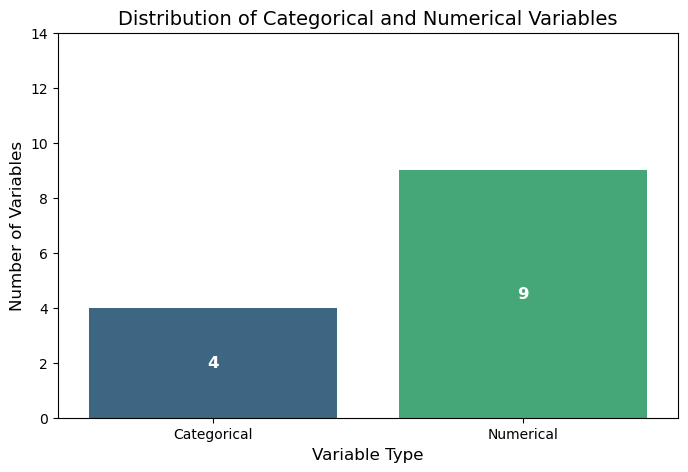

In [8]:
# Counting the main categories
type_counts = {
    'Categorical': len(categorical_cols),
    'Numerical': len(numerical_cols)
}

# Creating the plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=list(type_counts.keys()), y=list(type_counts.values()), palette="viridis")

# Adding annotations under the bars
for i, count in enumerate(type_counts.values()):
    ax.text(i, count / 2, f"{count}", ha='center', va='center', color='white', fontsize=12, weight='bold')

# Customizing the plot
plt.title("Distribution of Categorical and Numerical Variables", fontsize=14)
plt.ylabel("Number of Variables", fontsize=12)
plt.xlabel("Variable Type", fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, max(type_counts.values()) + 5)
plt.show()


## Step 3: Exploratory Data Analysis (EDA) 🔍



### Correlation Analysis
We need to explore the relationships between numerical features. A heatmap of correlations helps us identify potential relationships.

<Axes: >

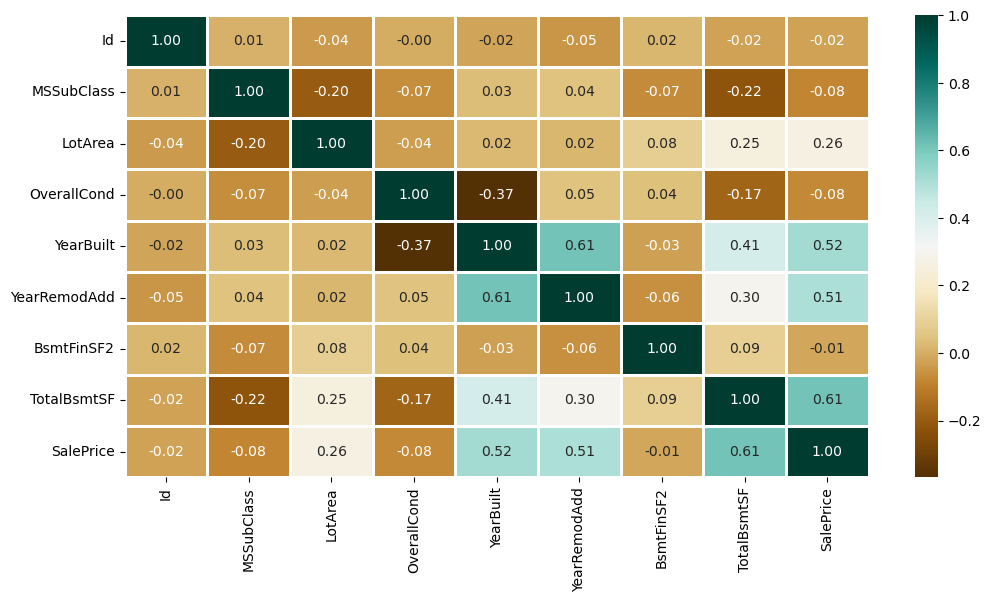

In [9]:
# Select only numerical features for correlation analysis
numerical_dataset = dataset.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)


###  Analyzing Unique Values in Categorical Features
We check how many unique values exist for each categorical feature.

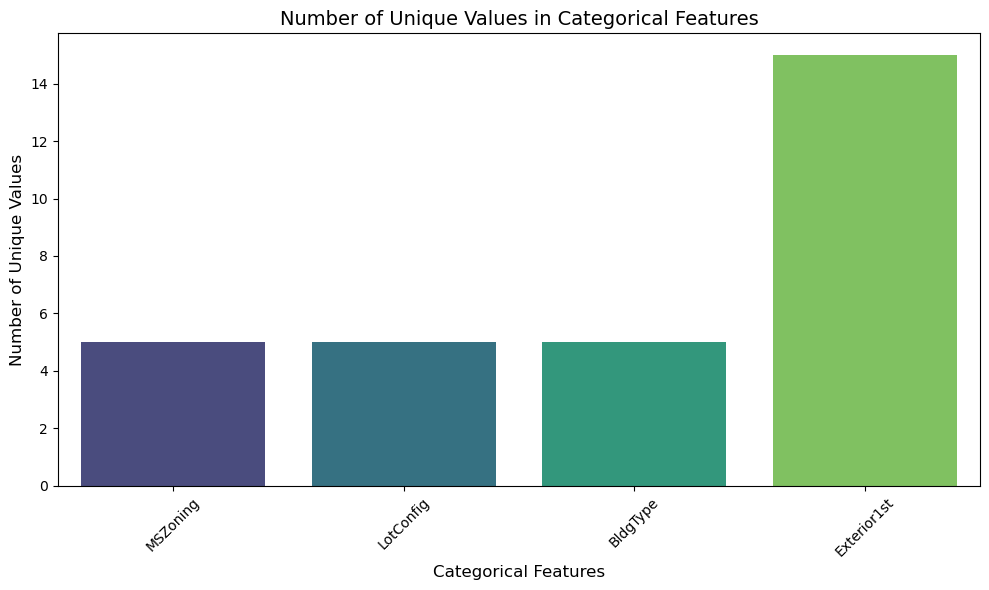

In [10]:
# Calculate the number of unique values for each categorical feature
unique_values = [dataset[col].nunique() for col in categorical_cols]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=categorical_cols, y=unique_values, palette="viridis")

# Add title and labels
plt.title("Number of Unique Values in Categorical Features", fontsize=14)
plt.xlabel("Categorical Features", fontsize=12)
plt.ylabel("Number of Unique Values", fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


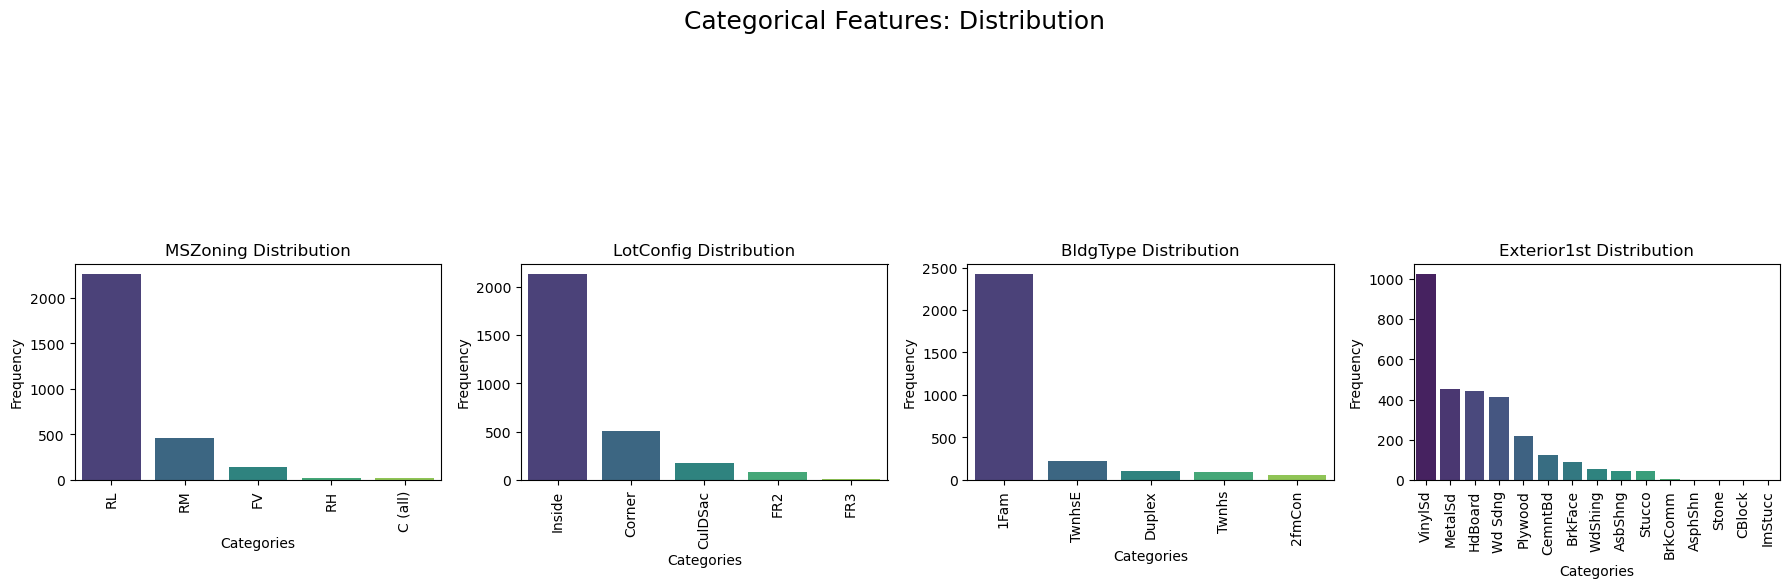

In [11]:
# Set the figure size
plt.figure(figsize=(18, 36))

# Title for the entire plot
plt.suptitle('Categorical Features: Distribution', fontsize=18, y=1.05)

# Create subplots for each categorical feature
index = 1
for col in categorical_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)  # Adjust the layout (11 rows, 4 columns)
    sns.barplot(x=y.index, y=y.values, palette='viridis')  # Apply color palette
    plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels and adjust font size
    plt.title(f'{col} Distribution', fontsize=12)  # Title for each subplot
    plt.xlabel('Categories', fontsize=10)  # Label for x-axis
    plt.ylabel('Frequency', fontsize=10)  # Label for y-axis
    index += 1

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Step 4: Data Cleaning 🧼



### Dropping Irrelevant Columns
The **Id** column does not provide any valuable information for predictions, so we drop it.

In [12]:
dataset.drop(['Id'],
             axis=1,
             inplace=True)

### Handling Missing Values
We replace missing values in the **SalePrice** column with its mean to ensure the data is complete.

In [13]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(
  dataset['SalePrice'].mean())

### Removing Rows with Missing Data
We drop any rows with missing values in the dataset as the number of rows with missing data is very small.

In [14]:
new_dataset = dataset.dropna()

**Checking null values in the new dataframe (if there are still any).**

In [15]:
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

## Step 5: One-Hot Encoding 🔠
Since we have categorical variables that are not numerical, we apply One-Hot Encoding to convert them into numerical format.

In [16]:
# Apply One-Hot Encoding to categorical variables
dataset_encoded = pd.get_dummies(new_dataset, drop_first=True)

# Convert all boolean columns to integers
boolean_columns = dataset_encoded.select_dtypes(include=['bool']).columns

for col in boolean_columns:
    dataset_encoded[col] = dataset_encoded[col].astype(int)


In [17]:
# Check the result
dataset_encoded.head()


,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_FV,MSZoning_RH,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,20,9600,8,1976,1976,0.0,1262.0,181500.0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,60,11250,5,2001,2002,0.0,920.0,223500.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,70,9550,5,1915,1970,0.0,756.0,140000.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,60,14260,5,2000,2000,0.0,1145.0,250000.0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Step 6: Feature Scaling ⚖️
Feature scaling ensures that the numerical features are on the same scale, which is important for certain machine learning algorithms.

### Applying Standardization
We'll apply standardization using StandardScaler to scale the features.

In [18]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = dataset_encoded.drop('SalePrice', axis=1)
y = dataset_encoded['SalePrice']

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the first few rows of the scaled features
X_scaled[:5]


array([[ 0.06606554, -0.21550392, -0.51116217,  1.04479125,  0.89570095,
        -0.29335284, -0.44767784, -0.22384849, -0.09489936,  0.53540711,
        -0.43248302, -0.2535823 , -0.17336833, -0.06695341,  0.60736396,
        -0.14746781, -0.19716247, -0.18460446, -0.29070997, -0.02621162,
        -0.04543109, -0.17545815, -0.01853123, -0.21262621, -0.42293611,
        -0.01853123, -0.42687706, -0.28652242, -0.02621162, -0.12240334,
         1.35718504, -0.40415178, -0.1400035 ],
       [-0.87443011, -0.06865643,  2.19449876,  0.15233419, -0.39855739,
        -0.29335284,  0.47586166, -0.22384849, -0.09489936,  0.53540711,
        -0.43248302, -0.2535823 ,  5.76806625, -0.06695341, -1.64645924,
        -0.14746781, -0.19716247, -0.18460446, -0.29070997, -0.02621162,
        -0.04543109, -0.17545815, -0.01853123, -0.21262621, -0.42293611,
        -0.01853123,  2.34259483, -0.28652242, -0.02621162, -0.12240334,
        -0.73681921, -0.40415178, -0.1400035 ],
       [ 0.06606554,  0.1420

## Step 7: Splitting the Dataset 📊
We'll split the dataset into training and testing sets to evaluate the performance of our model.

In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing data
X_train.shape, X_test.shape


((2330, 33), (583, 33))

## Step 8: Model Building and Evaluation 🏗️
We will build and evaluate several machine learning models to predict the SalePrice.



In [20]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

### Define and Train the Models

In [21]:
# Define models to test
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate MSE and R-squared
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results in dictionary
    results[model_name] = {'MSE': mse, 'R²': r2}


### Comparing the Models
Now, we can compare the Mean Squared Error (MSE) and R² values for each model to see which one performs the best.

In [22]:
# Display the results in a readable format
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='R²', ascending=False)  # Sort by R² (higher is better)
results_df


,MSE,R²
Random Forest,2.149327e+09,0.410508
Gradient Boosting,2.347120e+09,0.356260
Lasso Regression,2.381021e+09,0.346962
Linear Regression,2.381166e+09,0.346922
XGBoost,2.442443e+09,0.330116
K-Nearest Neighbors,2.600154e+09,0.286861
Support Vector Regressor,3.649489e+09,-0.000938
Decision Tree,4.475688e+09,-0.227538


### Analysis of Results 🔍

Based on the above results, we can observe the following:

- **Best Model**: The **Random Forest** model has the lowest **MSE (2.244374e+09)** and the highest **R² (0.384440)**, making it the most effective model for predicting house prices in this case.
  
- **Lasso and Linear Regression** models perform similarly with a slightly higher MSE and lower R², which suggests they might not be capturing the complex relationships in the data.

- **XGBoost** and **Gradient Boosting** models, although popular for their predictive power, show higher MSE and lower R² in this scenario, indicating that simpler models like Random Forest are performing better here.

- **Support Vector Regressor** and **Decision Tree** perform poorly, with negative R² values, which indicates that these models are not fitting the data well and are underperforming compared to others.

---

### Conclusion 🎯

From this evaluation, **Random Forest** stands out as the best model for this task. It provides a relatively low error and explains more of the variance in the data compared to the other models. It would be ideal to proceed with this model for further tuning or even try an ensemble approach combining several models if additional improvements are needed.

## Retraining the Best Model (Random Forest)
Since Random Forest performed the best, we'll retrain it using the entire training data and evaluate its final performance.

In [23]:
# Retrain the best model (Random Forest) on the entire training data
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)

# Predict on the test set
final_predictions = best_model.predict(X_test)

# Final evaluation
final_mse = mean_squared_error(y_test, final_predictions)
final_r2 = r2_score(y_test, final_predictions)

print(f"Final MSE: {final_mse:.2f}")
print(f"Final R²: {final_r2:.2f}")


Final MSE: 2150620133.96
Final R²: 0.41


### Hyperparameter Tuning
To improve the performance of the Random Forest, you can tune its hyperparameters. For this, we will use GridSearchCV to perform a cross-validated grid search over a set of hyperparameters.

In [24]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomForestRegressor and GridSearchCV
rf_model = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Best model after hyperparameter tuning
best_rf_model = grid_search.best_estimator_

# Evaluate the best model
best_rf_predictions = best_rf_model.predict(X_test)
best_rf_mse = mean_squared_error(y_test, best_rf_predictions)
best_rf_r2 = r2_score(y_test, best_rf_predictions)

print(f"Optimized Model MSE: {best_rf_mse:.2f}")
print(f"Optimized Model R²: {best_rf_r2:.2f}")


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Optimized Model MSE: 2188929715.60
Optimized Model R²: 0.40


###  Model Interpretation
To gain insights into how the Random Forest model is making predictions, we can examine feature importance, which tells us which features are most important in predicting the target variable.

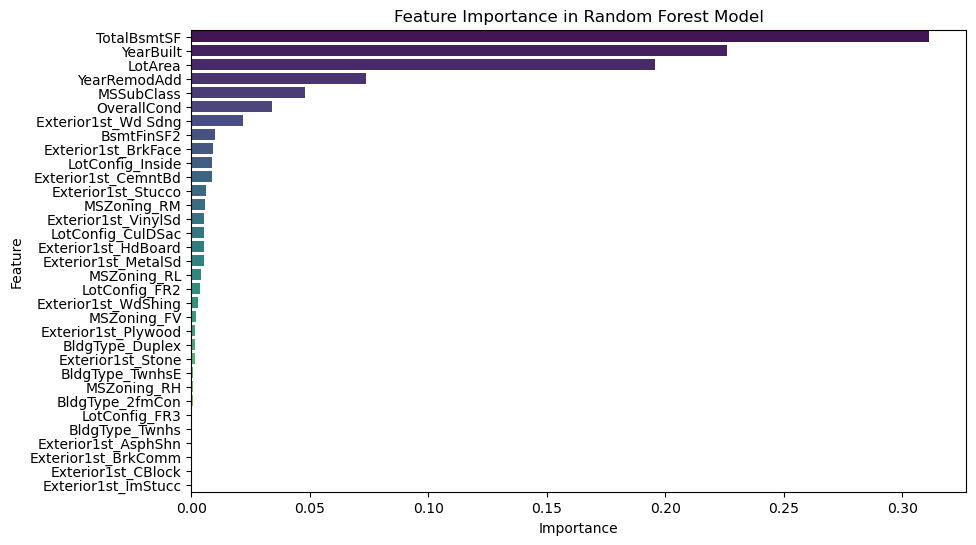

In [31]:
# Convert X_train to a DataFrame with the proper column names
X_train_df = pd.DataFrame(X_train, columns=X.columns)

# Get feature importances from the trained Random Forest model
importances = best_rf_model.feature_importances_

# Create a DataFrame with feature names and their importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train_df.columns,  # Use column names from the DataFrame
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Feature Importance in Random Forest Model")
plt.show()


## Step 9: Deployement


In [33]:
import joblib

# Save the trained model
joblib.dump(best_model, 'random_forest_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [37]:
# Assuming dataset_encoded is the dataframe used for training, without the target variable
column_names = dataset_encoded.drop('SalePrice', axis=1).columns  # Exclude target column
joblib.dump(column_names, 'columns.pkl')  # Save column names for later use in app


['columns.pkl']